**Importing libreries**



In [8]:
!pip3 install ann_visualizer
!pip install graphviz

  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-cp36-none-any.whl size=4169 sha256=4dffb4c1e218074512540dc0ff82f7e21bb48120ebf9fd1bb40e9568978cb3e0
  Stored in directory: /root/.cache/pip/wheels/b6/b4/4e/d92f50c9c4f004cf315a0e0fcd455486bd799c50fe80cf1f5d
Successfully built ann-visualizer


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from graphviz import Digraph

# Import tensorflow and keras
import tensorflow as tf
import keras

# For creating ANN model
from keras.layers import Dense, Dropout
from keras.models import Sequential

# For tuning ANN model
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# For splitting 
from sklearn.model_selection import train_test_split

# For scaling and encoding
from sklearn.preprocessing import LabelEncoder, StandardScaler

# For selecting the best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn import metrics

from ann_visualizer.visualize import ann_viz;

%matplotlib inline

**Importing dataset**

In [102]:
from google.colab import files
uploaded = files.upload()

Saving Churn_modelling.csv to Churn_modelling (1).csv


In [103]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Churn_modelling.csv']))

In [104]:
print(df.shape)
df.head(10)

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [105]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Encoding process**

In [106]:
encoder = LabelEncoder()

In [107]:
df['Surname'] = encoder.fit_transform(df['Surname'])
df['Geography'] = encoder.fit_transform(df['Geography'])
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Balance'] = encoder.fit_transform(df['Balance'])
df['EstimatedSalary'] = encoder.fit_transform(df['EstimatedSalary'])
df['CustomerId'] = encoder.fit_transform(df['CustomerId'])

In [108]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,2736,1115,619,0,0,42,2,0,1,1,1,5068,1
1,2,3258,1177,608,2,0,41,1,743,1,0,1,5639,0
2,3,2104,2040,502,0,0,42,8,5793,3,1,0,5707,1
3,4,5435,289,699,0,0,39,1,0,2,0,0,4704,0
4,5,6899,1822,850,2,0,43,2,3696,1,1,1,3925,0


**Data Visualization**

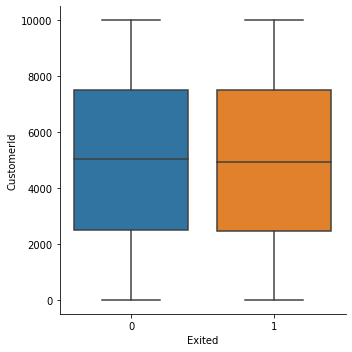

In [109]:
sns.catplot(x = 'Exited', y = 'CustomerId', data = df, kind = 'box')

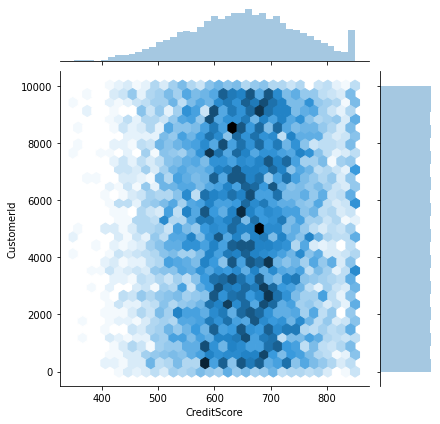

In [110]:
sns.jointplot(x = 'CreditScore', y = 'CustomerId', data = df, kind = 'hex')

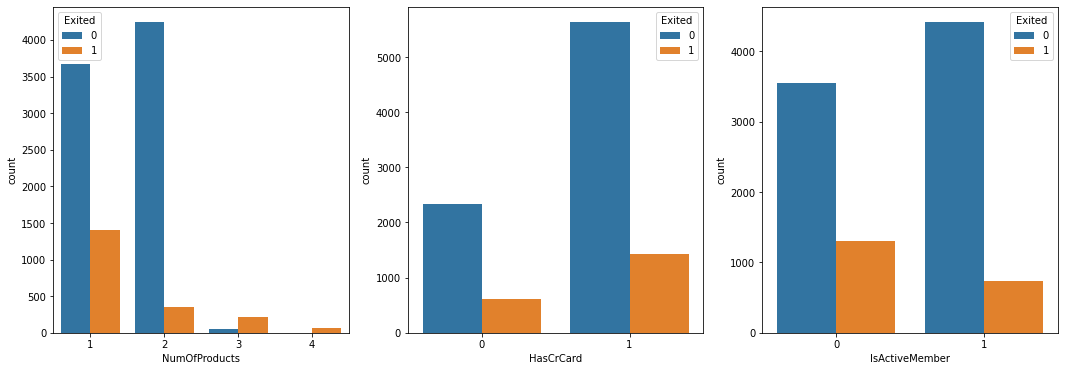

In [111]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.countplot(x = "NumOfProducts", hue="Exited", data = df, ax= ax[0])
sns.countplot(x = "HasCrCard", hue="Exited", data = df, ax = ax[1])
sns.countplot(x = "IsActiveMember", hue="Exited", data = df, ax = ax[2])

**Customers having CreditScore below 400 are exited.**

**Customers between age 50-60 are exited.**

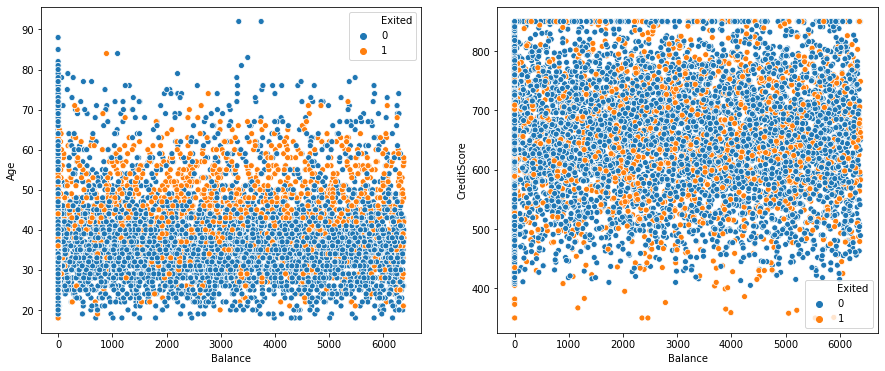

In [112]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(x = "Balance", y = "Age", data = df, hue="Exited", ax = ax[0])
sns.scatterplot(x = "Balance", y = "CreditScore", data = df, hue="Exited", ax = ax[1])

**This graph tells about the outliers present in the dataset.**

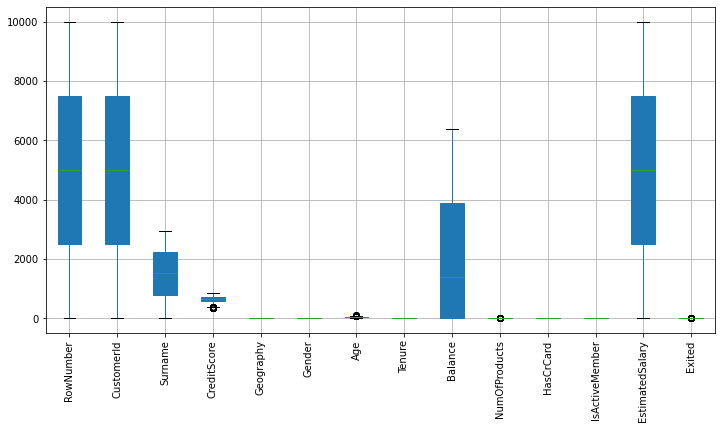

In [113]:
plt.figure(figsize=(12,6))
bplot = df.boxplot(patch_artist=True)
plt.xticks(rotation=90)       
plt.show()

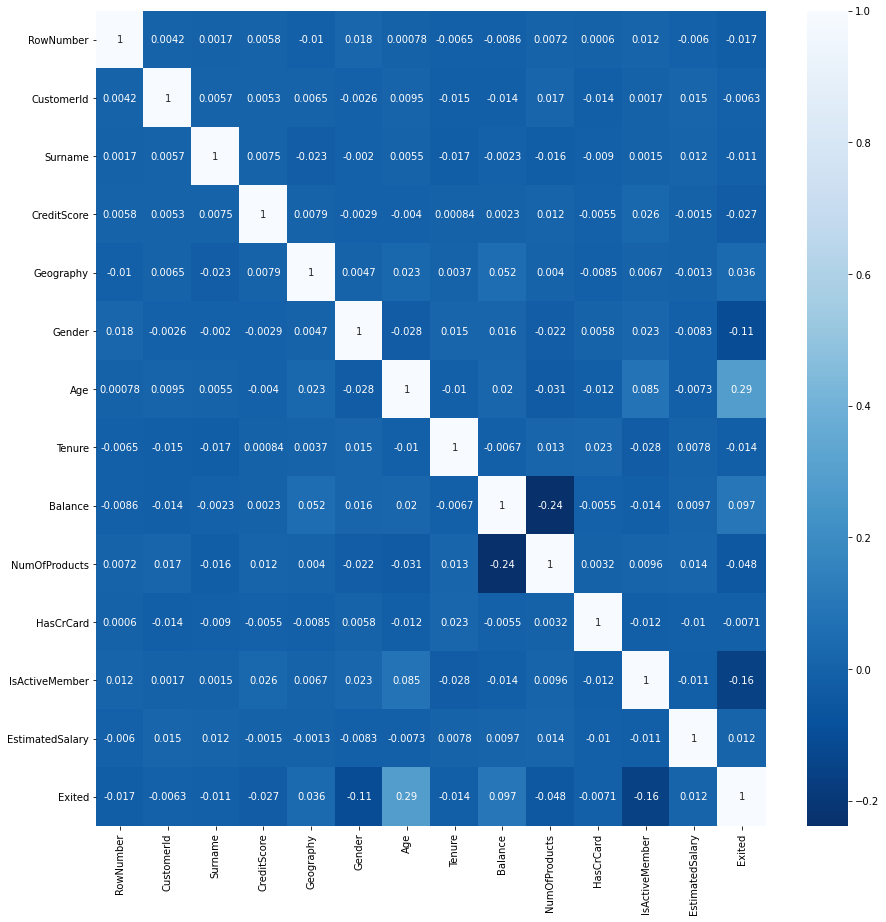

In [114]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues_r')

In [115]:
df.corr().loc[:, 'Exited'].abs().sort_values(ascending = False)

Exited             1.000000
Age                0.285323
IsActiveMember     0.156128
Gender             0.106512
Balance            0.097264
NumOfProducts      0.047820
Geography          0.035943
CreditScore        0.027094
RowNumber          0.016571
Tenure             0.014001
EstimatedSalary    0.012081
Surname            0.010822
HasCrCard          0.007138
CustomerId         0.006264
Name: Exited, dtype: float64

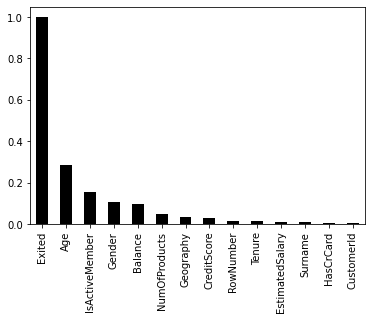

In [116]:
df.corr().loc[:, 'Exited'].abs().sort_values(ascending = False).plot.bar(color = 'black')

**Dividing the dataset.**

In [117]:
y = np.array(df['Exited'])
y = y.reshape(-1,1)

In [118]:
X = df.iloc[:, df.columns != 'Exited']

**By using SelectKBest method from sklearn for selection on the features.**

In [119]:
fs = SelectKBest(score_func=f_classif, k=10)
X_selected = fs.fit_transform(X, y)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [120]:
X_selected.shape

(10000, 10)

**Splitting of the dataset.**

In [121]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X_selected, y, random_state = 42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state = 42)

In [122]:
X_train_full.shape

(7500, 10)

**Standardizing of the dataset.**

In [123]:
scaler = StandardScaler()

In [124]:
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

**Seed command is used to generate the same result whenever we re-run the model.**

In [125]:
np.random.seed(42)
tf.random.set_seed(42)

**Creating ANN model.**

In [126]:
model = Sequential()

model.add(Dense(32, input_shape = (10, ), name = 'Input'))
model.add(Dense(64, activation = 'relu', name = 'Dense_1'))
model.add(Dense(128, activation = 'relu', name = 'Dense_2'))
model.add(Dropout(0.3))

model.add(Dense(200, activation = 'relu', name = 'Dense_3'))
model.add(Dense(300, activation = 'relu', name = 'Dense_4'))
model.add(Dense(400, activation = 'relu', name = 'Dense_5'))
model.add(Dropout(0.3))

model.add(Dense(128, activation = 'relu', name = 'Dense_6'))
model.add(Dense(64, activation = 'relu', name = 'Dense_7'))
model.add(Dense(32, activation = 'relu', name = 'Dense_8'))
model.add(Dropout(0.3))

model.add(Dense(10, activation = 'softmax', name = 'Output'))

model.compile(loss = keras.losses.SparseCategoricalCrossentropy(),
              optimizer = keras.optimizers.RMSprop(learning_rate = 0.01),
              metrics = [keras.metrics.SparseCategoricalAccuracy()])



In [127]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Dense)                (None, 32)                352       
_________________________________________________________________
Dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
Dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
Dense_3 (Dense)              (None, 200)               25800     
_________________________________________________________________
Dense_4 (Dense)              (None, 300)               60300     
_________________________________________________________________
Dense_5 (Dense)              (None, 400)              

In [128]:
ann_viz(model, view = True, filename='model1.gv.pdf', title= 'My Neural Network');

In [129]:
weights, biases = model.layers[1].get_weights() # for layer 1

In [130]:
weights

array([[-0.12031692, -0.08976907, -0.23877043, ...,  0.09594661,
         0.00928485, -0.12950742],
       [-0.20182282, -0.00377631,  0.10914105, ...,  0.191742  ,
         0.03104722, -0.03233194],
       [ 0.07831842,  0.03592807,  0.02992177, ...,  0.06831288,
         0.1035111 ,  0.0645687 ],
       ...,
       [ 0.11640817,  0.04532921, -0.1307149 , ...,  0.18074268,
        -0.02056754, -0.17771918],
       [ 0.09863585,  0.10649437, -0.09170848, ...,  0.1015144 ,
        -0.24950069, -0.11506158],
       [ 0.05669242,  0.2362532 , -0.01225197, ...,  0.0861544 ,
         0.0264836 , -0.11000508]], dtype=float32)

In [131]:
weights.shape                # for layer 1

(32, 64)

In [132]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

**Fitting of the model.**

In [94]:
model_history = model.fit(X_train, y_train, epochs = 60, batch_size = 64, verbose = 2, validation_data = (X_valid, y_valid))


Train on 5625 samples, validate on 1875 samples
Epoch 1/60
 - 1s - loss: 0.4764 - sparse_categorical_accuracy: 0.8286 - val_loss: 0.4851 - val_sparse_categorical_accuracy: 0.8128
Epoch 2/60
 - 1s - loss: 0.4642 - sparse_categorical_accuracy: 0.8231 - val_loss: 0.4569 - val_sparse_categorical_accuracy: 0.7995
Epoch 3/60
 - 1s - loss: 0.4819 - sparse_categorical_accuracy: 0.8012 - val_loss: 0.4652 - val_sparse_categorical_accuracy: 0.8160
Epoch 4/60
 - 1s - loss: 0.4868 - sparse_categorical_accuracy: 0.8171 - val_loss: 0.4893 - val_sparse_categorical_accuracy: 0.8085
Epoch 5/60
 - 1s - loss: 0.4870 - sparse_categorical_accuracy: 0.8176 - val_loss: 0.4670 - val_sparse_categorical_accuracy: 0.8229
Epoch 6/60
 - 1s - loss: 0.4684 - sparse_categorical_accuracy: 0.8116 - val_loss: 0.4670 - val_sparse_categorical_accuracy: 0.7941
Epoch 7/60
 - 1s - loss: 0.4967 - sparse_categorical_accuracy: 0.8012 - val_loss: 0.4970 - val_sparse_categorical_accuracy: 0.8016
Epoch 8/60
 - 1s - loss: 0.4993 - s

In [95]:
model_eve = model.evaluate(X_test, y_test)
print('Loss = ', model_eve[0])
print('Accuracy = ', model_eve[1]*100)

2500/2500 [==============================] - 0s 41us/step
Loss =  0.49874016513824465
Accuracy =  80.11999726295471


In [96]:
history = model_history.history

**Below graph shows that our model is well conversed.**

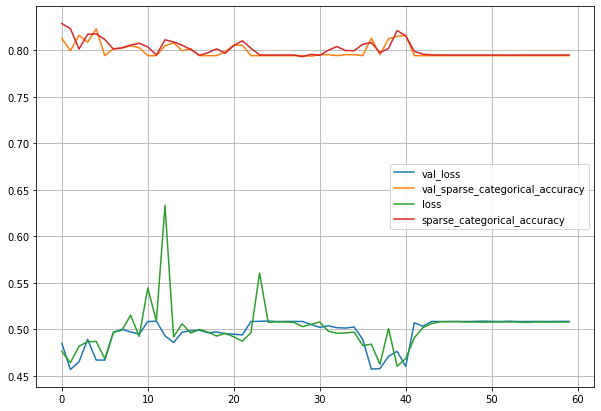

In [97]:
pd.DataFrame(history).plot(figsize = (10, 7))
plt.gca()
plt.grid(True)
plt.show()

In [66]:
y_pred = model.predict(X_test)
print(y_pred)

[[8.8040942e-01 1.1959050e-01 2.4202981e-08 ... 1.6727606e-08
  1.6577911e-08 1.6812466e-08]
 [8.8040942e-01 1.1959050e-01 2.4202981e-08 ... 1.6727606e-08
  1.6577911e-08 1.6812466e-08]
 [8.8040942e-01 1.1959050e-01 2.4202981e-08 ... 1.6727606e-08
  1.6577911e-08 1.6812466e-08]
 ...
 [8.8040942e-01 1.1959050e-01 2.4202981e-08 ... 1.6727606e-08
  1.6577911e-08 1.6812466e-08]
 [8.8040942e-01 1.1959050e-01 2.4202981e-08 ... 1.6727606e-08
  1.6577911e-08 1.6812466e-08]
 [8.8040942e-01 1.1959050e-01 2.4202981e-08 ... 1.6727606e-08
  1.6577911e-08 1.6812466e-08]]


In [68]:
y_pred_new = print(y_pred.round())

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


**Tuning of the model.**

In [84]:
def build_classifier(optimizer, learn_rate):
  classifier = Sequential()

  classifier.add(Dense(32, input_shape = (10, ), name = 'Input'))
  classifier.add(Dense(64, activation = 'relu',  name = 'Dense_1'))
  classifier.add(Dense(128, activation = 'relu',  name = 'Dense_2'))
  classifier.add(Dropout(0.3))

  classifier.add(Dense(200, activation = 'relu',   name = 'Dense_3'))
  classifier.add(Dense(400, activation = 'relu',  name = 'Dense_4'))
  classifier.add(Dense(200, activation = 'relu',  name = 'Dense_5'))
  classifier.add(Dropout(0.3))

  classifier.add(Dense(128, activation='relu',  name = 'Dense_6'))
  classifier.add(Dense(64, activation='relu',  name = 'Dense_7'))
  classifier.add(Dense(32, activation='relu',  name = 'Dense_8'))
  classifier.add(Dropout(0.3))

  classifier.add(Dense(10, activation = 'softmax',  name = 'Output'))


  classifier.compile(loss = keras.losses.SparseCategoricalCrossentropy(),
              optimizer = keras.optimizers.RMSprop(learning_rate = 0.01),
              metrics = [keras.metrics.SparseCategoricalAccuracy()]
              )
  
  return classifier

In [85]:
classifier = KerasClassifier(build_fn = build_classifier, epochs = 40, batch_size = 64, verbose = 2)

In [86]:
parameters = {'optimizer':['Adam', 'RMSprop'],
              'learn_rate': [0.001, 0.01, 0.1],
              'epochs': [40,60,100],
              }

grid = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', n_jobs = -1, cv = 3, verbose = 2)

In [87]:
grid_result = grid.fit(X_test, y_test)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  9.4min finished


Epoch 1/100
 - 0s - loss: 1.2303 - sparse_categorical_accuracy: 0.7128
Epoch 2/100
 - 0s - loss: 0.5461 - sparse_categorical_accuracy: 0.7996
Epoch 3/100
 - 0s - loss: 0.5081 - sparse_categorical_accuracy: 0.8100
Epoch 4/100
 - 0s - loss: 0.4776 - sparse_categorical_accuracy: 0.8148
Epoch 5/100
 - 0s - loss: 0.4906 - sparse_categorical_accuracy: 0.8144
Epoch 6/100
 - 0s - loss: 0.4514 - sparse_categorical_accuracy: 0.8264
Epoch 7/100
 - 0s - loss: 0.4582 - sparse_categorical_accuracy: 0.8124
Epoch 8/100
 - 0s - loss: 0.4521 - sparse_categorical_accuracy: 0.8232
Epoch 9/100
 - 0s - loss: 0.4557 - sparse_categorical_accuracy: 0.8292
Epoch 10/100
 - 0s - loss: 0.4294 - sparse_categorical_accuracy: 0.8332
Epoch 11/100
 - 0s - loss: 0.4321 - sparse_categorical_accuracy: 0.8348
Epoch 12/100
 - 0s - loss: 0.4301 - sparse_categorical_accuracy: 0.8388
Epoch 13/100
 - 0s - loss: 0.4235 - sparse_categorical_accuracy: 0.8280
Epoch 14/100
 - 0s - loss: 0.4195 - sparse_categorical_accuracy: 0.8348
E

In [99]:
grid_result.best_estimator_

In [88]:
grid_result.best_params_

{'epochs': 100, 'learn_rate': 0.001, 'optimizer': 'RMSprop'}

In [100]:
print('Score = ',(grid_result.best_score_)*100)

Score =  84.3203948245965


**Before tuning the model score was 80.11 %.**

**After tuning bthe model score is 84.32 %.**